In [24]:
# Data Loading and Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading data from csv files
df = pd.read_csv('owid-covid-data.csv')

# Check columns
df.columns
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
# Preview rows
df.head()
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [4]:
# Check for missing values
df.isnull().sum()
print(df.isnull().sum())

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [5]:
# Data cleaning
# Filter countries of interest(e.g., 'United States', 'India', 'Brazil')
countries_of_interest = ['United States', 'India', 'Brazil']
df_filtered = df[df['location'].isin(countries_of_interest)]
print(df_filtered.head())

      iso_code      continent location        date  total_cases  new_cases  \
41567      BRA  South America   Brazil  2020-01-03          NaN        0.0   
41568      BRA  South America   Brazil  2020-01-04          NaN        0.0   
41569      BRA  South America   Brazil  2020-01-05          NaN        0.0   
41570      BRA  South America   Brazil  2020-01-06          NaN        0.0   
41571      BRA  South America   Brazil  2020-01-07          NaN        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
41567                 NaN           NaN         0.0                  NaN  ...   
41568                 NaN           NaN         0.0                  NaN  ...   
41569                 NaN           NaN         0.0                  NaN  ...   
41570                 NaN           NaN         0.0                  NaN  ...   
41571                 NaN           NaN         0.0                  NaN  ...   

       male_smokers  handwashing_facilities 

In [6]:
# Drop rows with missing dates/critcal values
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])
print(df_filtered.isnull().sum())


iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       3727
excess_mortality_cumulative                3727
excess_mortality                           3727
excess_mortality_cumulative_per_million    3727
Length: 67, dtype: int64


In [7]:
# Convert date column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
print(df_filtered.dtypes)

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object


In [8]:
# Missing numeric values with fillna
df_filtered['total_cases'] = df_filtered['total_cases'].fillna(0)
df_filtered['total_deaths'] = df_filtered['total_deaths'].fillna(0)
print(df_filtered.isnull().sum())

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       3727
excess_mortality_cumulative                3727
excess_mortality                           3727
excess_mortality_cumulative_per_million    3727
Length: 67, dtype: int64


In [9]:
# Death rate calculation
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases'] * 100
print(df_filtered[['total_cases', 'total_deaths', 'death_rate']].head())

       total_cases  total_deaths  death_rate
41643        291.0           1.0    0.343643
41644        428.0           4.0    0.934579
41645        428.0           4.0    0.934579
41646        904.0          11.0    1.216814
41647        904.0          11.0    1.216814


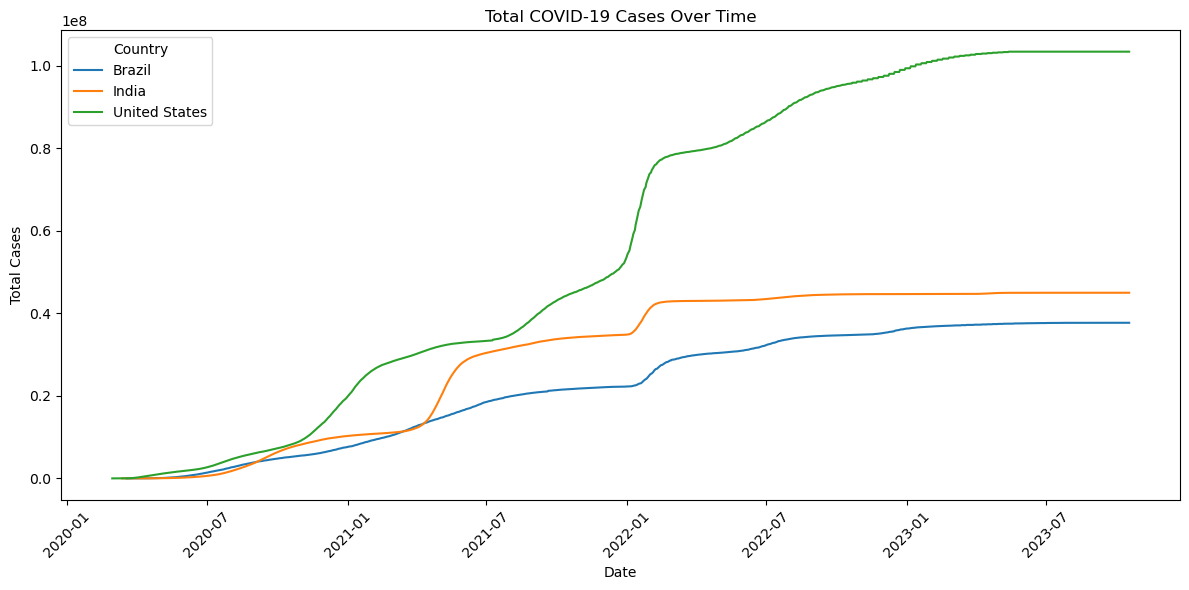

In [10]:
# Descriptive statistics and trends
# Plotting total cases over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

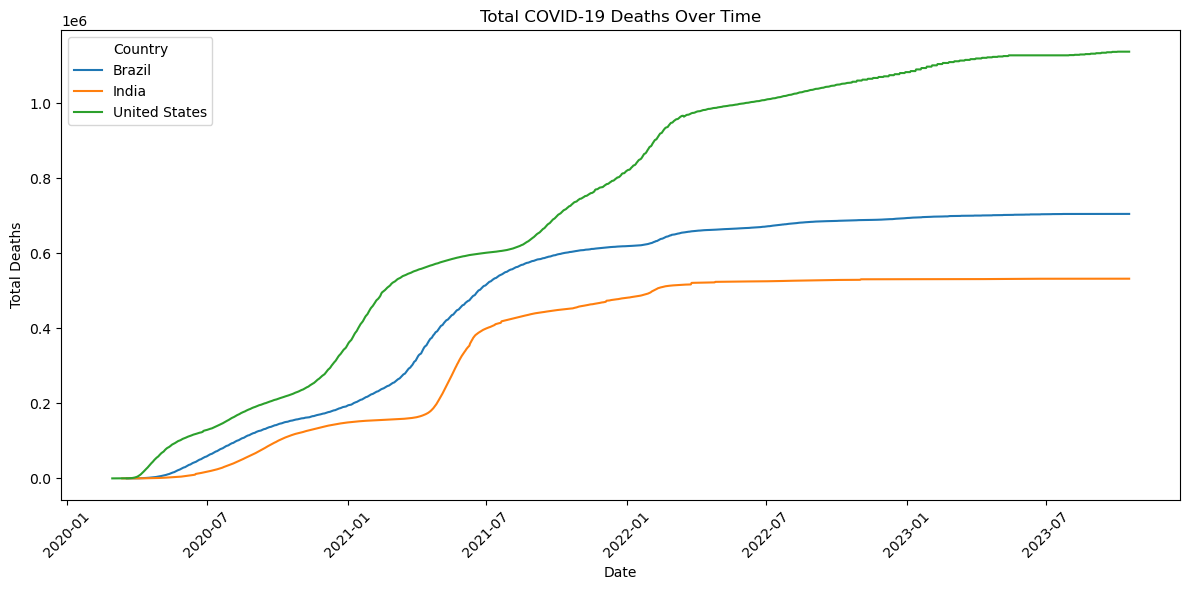

In [11]:
# Plotting total deaths over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


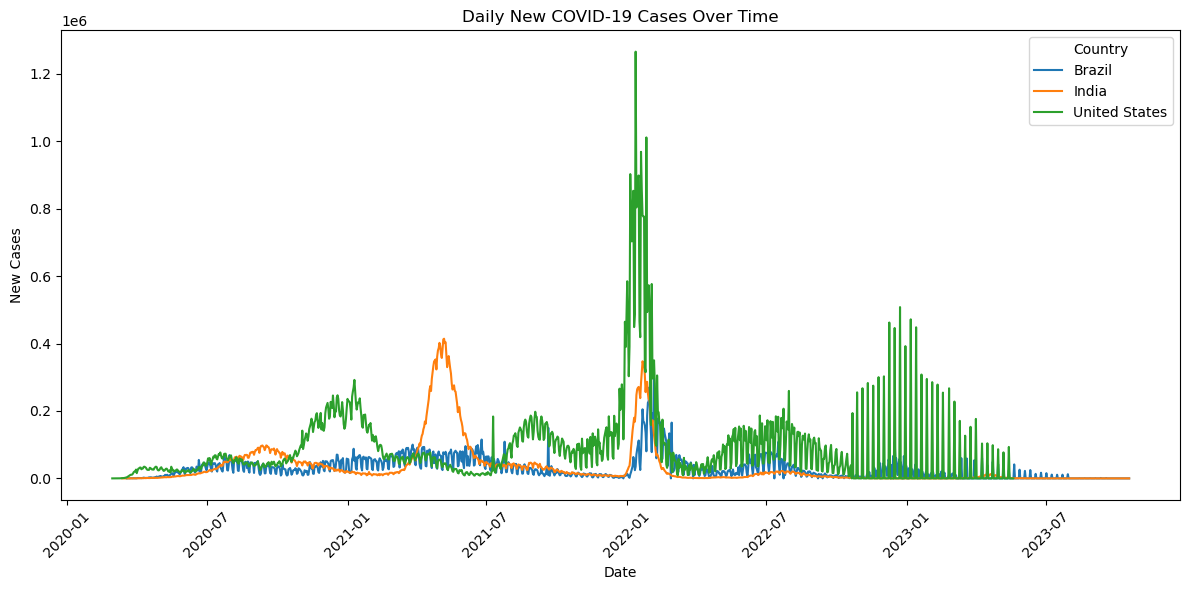

In [12]:
# Compare daily new cases between countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

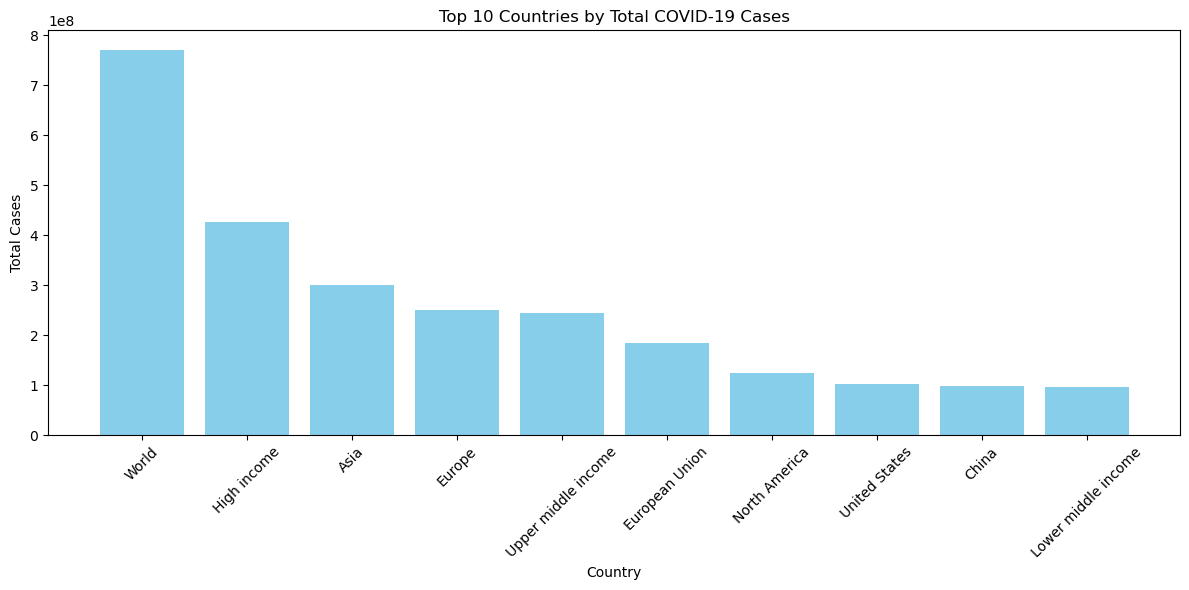

In [14]:
# Bar graph for top countries by total cases
plt.figure(figsize=(12, 6))
top_countries = df.groupby('location')['total_cases'].max().nlargest(10).reset_index()
plt.bar(top_countries['location'], top_countries['total_cases'], color='skyblue')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

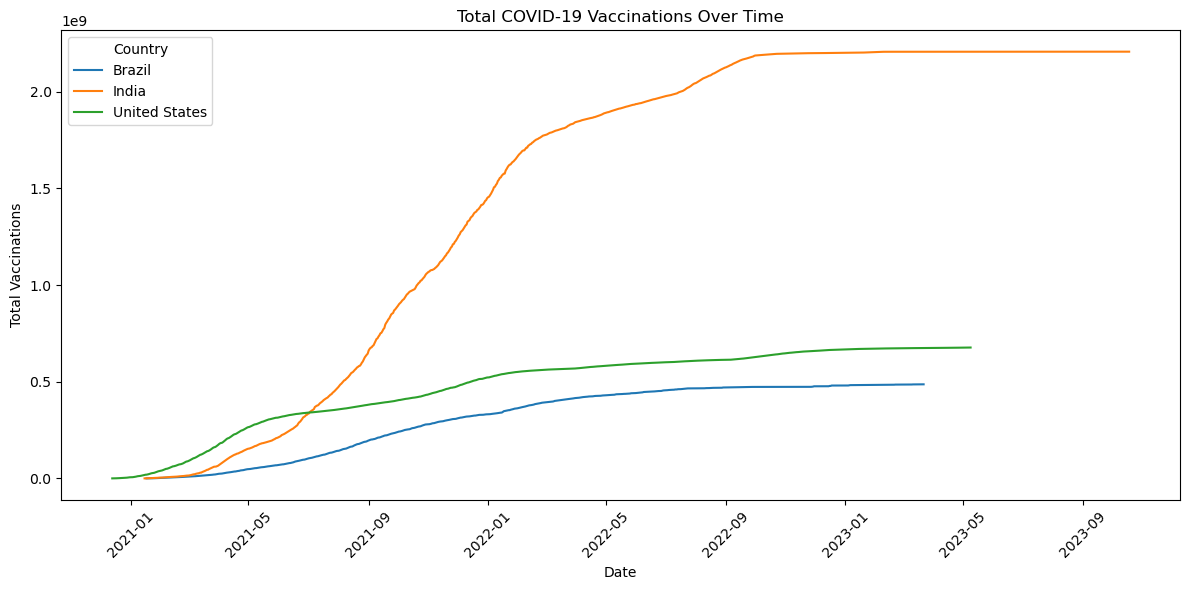

In [19]:
# Vaccination data exploration
# Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


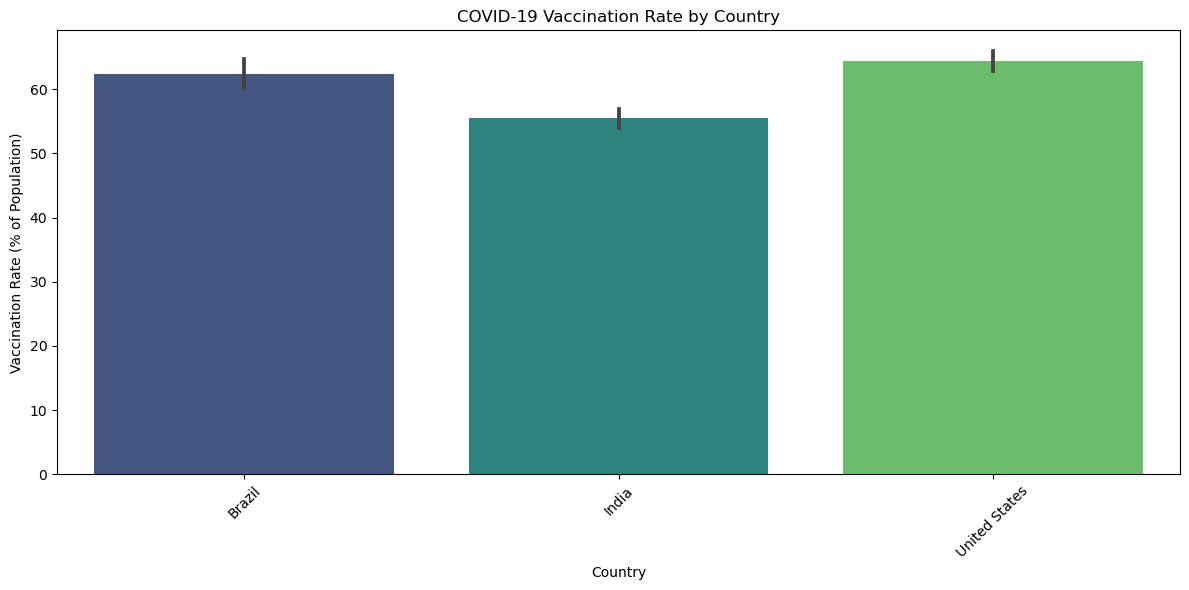

In [20]:
# Compare % vaccinated population between countries
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x='location', y='people_vaccinated_per_hundred', palette='viridis')
plt.title('COVID-19 Vaccination Rate by Country')
plt.xlabel('Country')
plt.ylabel('Vaccination Rate (% of Population)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# dataframe with iso_code, total_cases for the latest date
latest_date = df_filtered['date'].max()
df_latest = df_filtered[df_filtered['date'] == latest_date][['iso_code', 'total_cases']].copy()
df_latest = df_latest.rename(columns={'total_cases': 'Total Cases'})

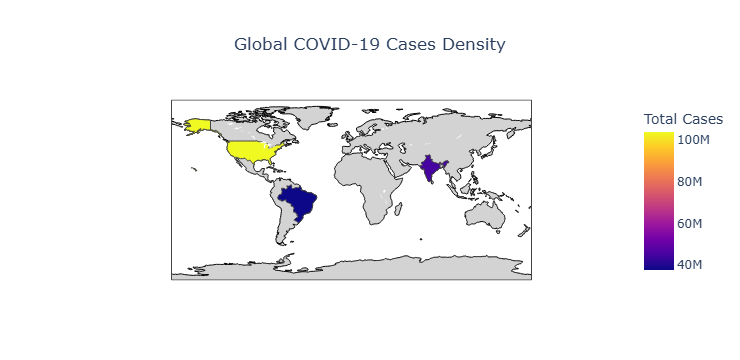

In [31]:
fig = px.choropleth(df_latest, 
                    locations='iso_code', 
                    locationmode='ISO-3',
                    color='Total Cases',
                    hover_name='iso_code',
                    title='Global COVID-19 Cases Density',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_geos(showcoastlines=True, coastlinecolor='Black', showland=True, landcolor='LightGray')
fig.update_layout(title_x=0.5)
fig.show()